# Classificação de objetos

In [4]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

import datetime
import dlib
from scipy.spatial import distance as dist

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

## 1. Requerimentos

Utilize o comando ao lado para instalar pelo Anaconda terminal.

* OpenCV 3.4.3 (```conda install -c conda-forge opencv==3.4.3```)
* Matplotlib 3.1.3 (```conda install matplotlib==3.1.3```)
* Seaborn 0.0.10 (```conda install -c conda-forge seaborn==0.10.0```)
* Numpy 1.18.1 (```conda install numpy==1.15.2```)
* Scipy 1.4.1 (```conda install scipy==1.4.1```)

In [5]:
if cv2.__version__ == "3.4.3":
    print("Versão correta ("+ cv2.__version__  +").")
else:
    print("Versão incorreta ("+ cv2.__version__  +"). Instale a versão conforme instruções.")

Versão correta (3.4.3).


Carregando um classificador pré-treinado de Haar.

Analise posteriormente outros classificadores disponíveis, dentre eles, classificador de pessoas, automóveis, gatos, sorriso, olhos, etc. neste repositório oficial do OpenCV https://github.com/opencv/opencv/tree/master/data/haarcascades.

## 2. Classificador em Cascata de Faces

Este classificador é especializado em identificar faces. Devido a característica deste tipo de classificador, sua identificação é extramamente rápida, com identificação < 0,02s, aplicações em sistemas em tempo real, especialmente câmeras de vigilância.

In [17]:
# Carregando classifcador
classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

imagem = cv2.imread('imagens/people.jpg')

imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

Text(0.5,1,'Face(s) identificadas em 0:00:00.061139')

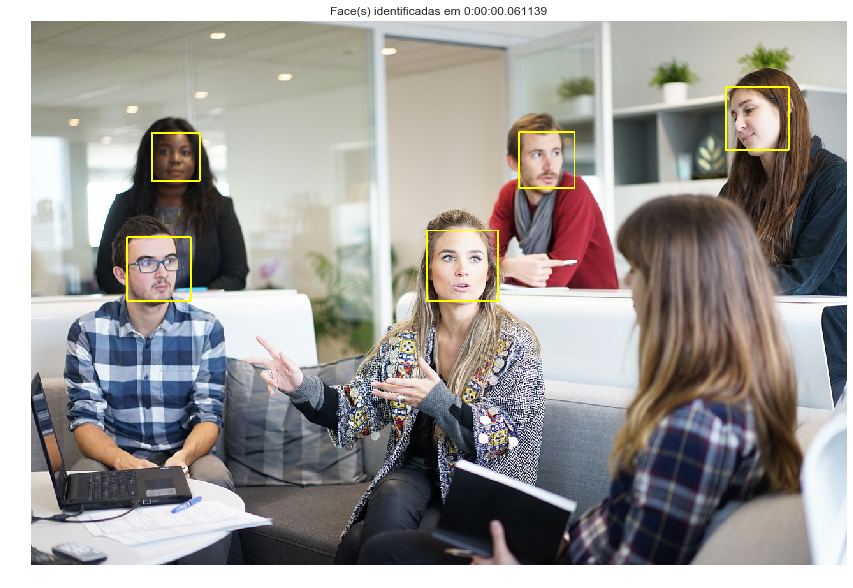

In [18]:
# Retornará a região de interesse da face identificada como tupla, armazenando as coordenadas superiores esquerda e inferior 
# direita.
# Se retornar vazio é por que não há faces identificadas.
# Os valores padrão são configurações inciais recomendadas 
# (cv.HaarDetectObjects(image, cascade, storage, scale_factor=1.1, min_neighbors=3, flags=0, min_size=(0, 0)))

inicio = datetime.datetime.now()
faces = classificador_face.detectMultiScale(imagem_gray, 1.3, 5)
fim = datetime.datetime.now()

# Lista de faces. Caso não seja identificada será retornado None (nulo)
if faces is None:
     cv2.putText(imagem, "Rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 6)
    

# Desenhando retângulos nos rostos identificados
for (x,y,w,h) in faces:
    cv2.rectangle(imagem, (x,y), (x+w,y+h), (255,255,0), 2)
    
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.axis('off')
plt.title("Face(s) identificadas em " +  str(fim - inicio))

Construindo funções para utilizar em capturas de vídeo.

In [11]:
def identificar_rosto(imagem):
    classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = classificador_face.detectMultiScale(imagem_gray, 1.3, 5)

    if faces is ():
         cv2.putText(imagem, "Rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 6)

    for (x,y,w,h) in faces:
        cv2.rectangle(imagem, (x,y), (x+w,y+h), (127,0,255), 2)

    return imagem

Text(0.5,1,'Face(s) identificadas')

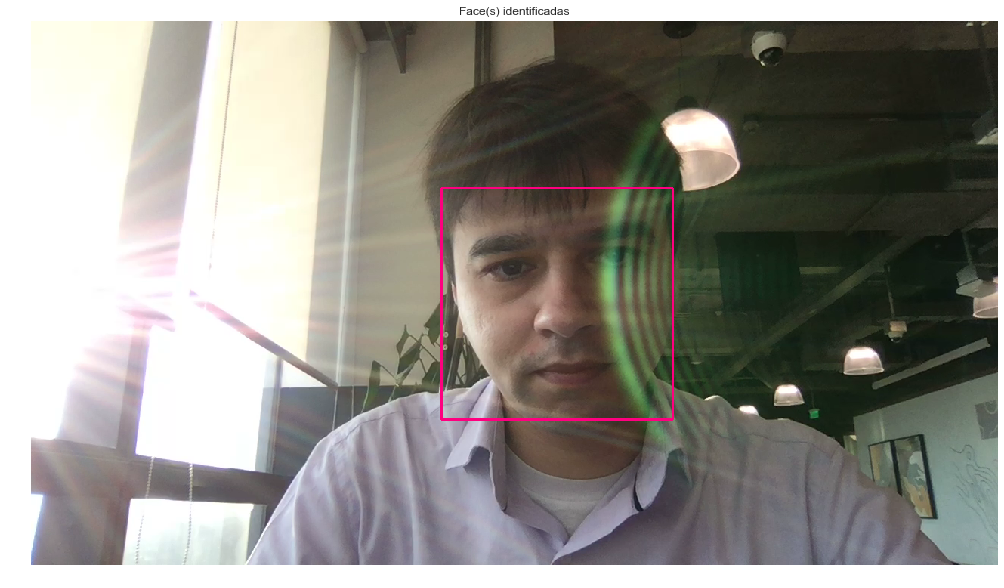

In [19]:
imagem = cv2.imread("imagens/camera_output_1.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.axis('off')
plt.title("Face(s) identificadas")

Aplicando a uma imagem coletada de uma câmera.

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = identificar_rosto(frame)
        cv2.imshow("Rosto", transformacao_tracos(frame))
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

## 3. Classificador em Cascata Customizado

Construir um classificador em cascata especializado consiste em reunir imagens de treino positivas e negativas, diferentemente de outros tipos de classificadores, como por exemplo os de _deep learning_. 

O processo de construção é realizado por meio de utilitários em linha de comando do OpenCV, que apesar de não ser complexo pode envolver uma dedicação maior. Por tal razão, vamos optar por este [utilitário](http://amin-ahmadi.com/cascade-trainer-gui/), de Amin Ahmadi, criado para ser executado em Windows que facilita muito este processo. http://amin-ahmadi.com/cascade-trainer-gui/.

As imagens para as etapas de treino podem ser baixadas em http://www.dis.uniroma1.it/~labrococo/?q=node/459. 

In [20]:
def identificar_bola(imagem):
    ball_classifier = cv2.CascadeClassifier('ball/classifier/cascade.xml')
  
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    balls = ball_classifier.detectMultiScale(gray, 1.3, 3)

    for (x,y,w,h) in balls:
        roi = imagem[y:y+h, x:x+w]
        area = int(w) * int(h)
        if area > 1500:
            cv2.rectangle(imagem, (x,y), (x+w,y+h), (127,0,255), 2)
            cv2.putText(imagem, "bola", (x,y-20), cv2.FONT_HERSHEY_PLAIN, 2, (127,0,255), 2)
        
    return imagem

Text(0.5,1,'Bola identificada')

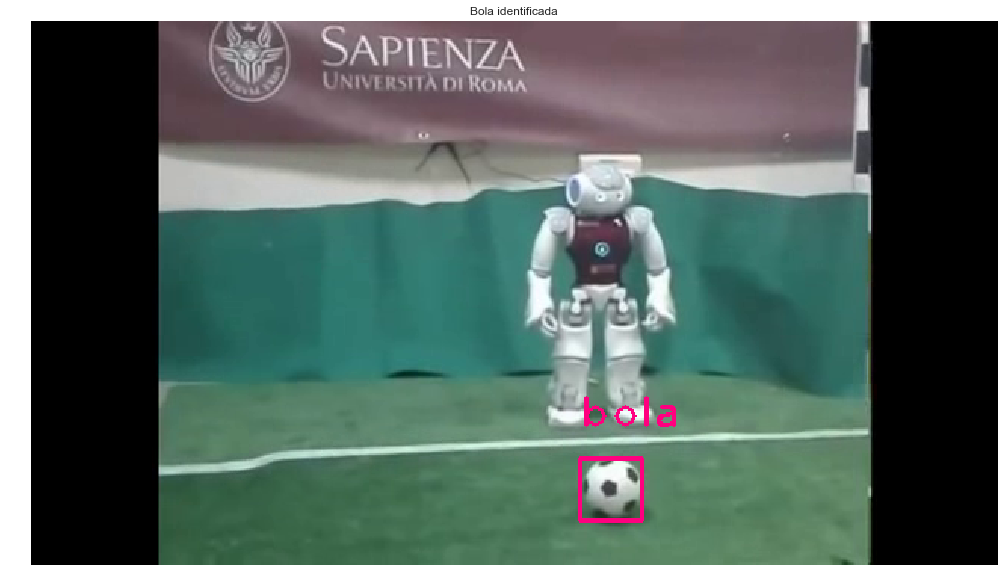

In [20]:
imagem = cv2.imread("imagens/camera_output_2.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.axis('off')
plt.title("Bola identificada")

### Windows

In [ ]:
cam_capture = cv2.VideoCapture("videos/soccer.avi")

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = identificar_bola(frame)
        cv2.imshow("Bola", transformacao_tracos(frame))
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

## 4. Classificador de Pessoas

Este classificador identifica pessoas (corpos inteiros). Sua utilidade é para segmentar e localizar uma ou mais pessoas em uma determinada cena.

Repare que pessoas muito próximas uma das outras prejudica a identificação. Em vídeos de vigilância, este aspecto negativo é diminuído, pois ha muitas oportunidades do classificador inferir, e conseguir identificar as pessoas em outros momentos onde estão mais separadas umas das outroas>

In [22]:
def identificar_pessoas(imagem):
    body_classifier = cv2.CascadeClassifier('classificadores/haarcascade_fullbody.xml')
  
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    for (x,y,w,h) in bodies:
        roi = imagem[y:y+h, x:x+w]
        area = int(w) * int(h)
        cv2.rectangle(imagem, (x,y), (x+w,y+h), (127,0,255), 2)
        cv2.putText(imagem, "pessoa", (x,y-20), cv2.FONT_HERSHEY_PLAIN, 2, (127,0,255), 2)
        
    return imagem

Text(0.5,1,'Pessoas')

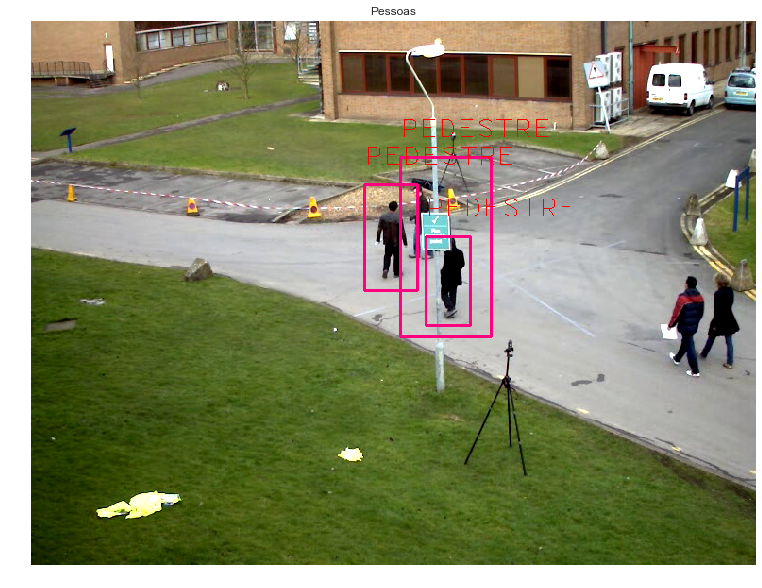

In [23]:
imagem = cv2.imread("imagens/camera_output_3.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.axis('off')
plt.title("Pessoas")

Aplicando vídeo para classificação.

In [ ]:
cam_capture = cv2.VideoCapture("videos/walking.avi")

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = identificar_pessoas(frame)
        cv2.imshow("Pessoas", transformacao_tracos(frame))
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

## 5. Classificador em Cascata de Automóveis

Classificador especializado em identificar automóveis.

In [31]:
def identificar_carros(imagem):
    cars_classifier = cv2.CascadeClassifier('classificadores/haarcascade_car.xml')
  
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    cars = cars_classifier.detectMultiScale(gray, 1.2, 3)

    for (x,y,w,h) in cars:
        roi = imagem[y:y+h, x:x+w]
        area = int(w) * int(h)
        cv2.rectangle(imagem, (x,y), (x+w,y+h), (127,0,255), 2)
        cv2.putText(imagem, "carro", (x,y-20), cv2.FONT_HERSHEY_PLAIN, 2, (127,0,255), 2)
        
    return imagem

Text(0.5,1,'Carros')

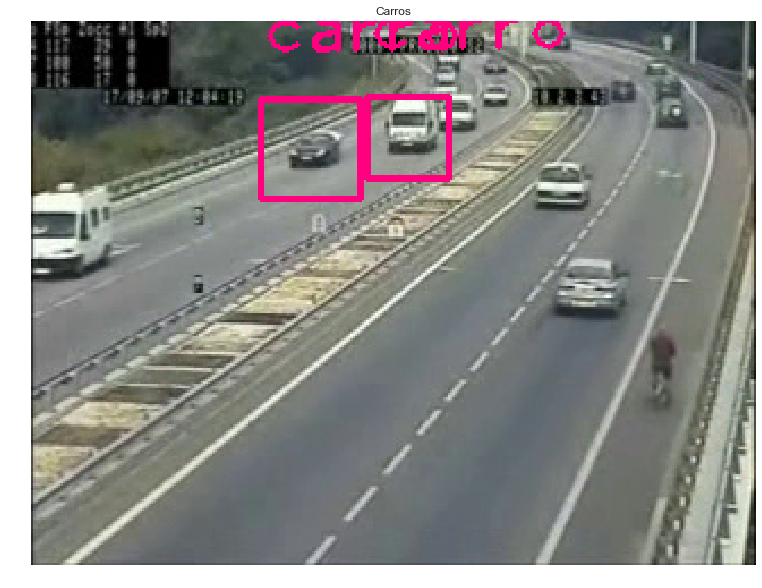

In [25]:
imagem = cv2.imread("imagens/camera_output_4.png")

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem)
plt.title("Carros")

Aplicando vídeo para classificação.

In [ ]:
cam_capture = cv2.VideoCapture("videos/cars.avi")

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = identificar_carros(frame)
        cv2.imshow("Carros", transformacao_tracos(frame))
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

## 6. Identificação de Faces e Marcos Faciais

A instalção do **Dlib** em Windows ficou integrada com este repositório 
```conda install -c conda-forge dlib```
Evite seguir outros tutoriais pois envolve um método antigo e complexo de compilação de bibliotecas em C e instalações separadas.


Os modelos podem ser baixados neste endereço http://dlib.net/files/.

O valor do segundo parâmetro do detector refere-se a escala da imagem. Deixamos igual a 1 se a imagem permanecer a mesma.

In [13]:
classificador_68_path = "modelos/shape_predictor_68_face_landmarks.dat"

classificador = dlib.shape_predictor(classificador_68_path)
detector = dlib.get_frontal_face_detector()

def obter_marcos(im):
    retangulos = detector(im, 1)

    if len(retangulos) == 0:
        return None
        
    marcos = []
    
    for retangulo in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()]))

    return marcos

def anotar_marcos(im, marcos):
    im = im.copy()
    
    if marcos is None:
        return im
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0, 0], ponto[0, 1])
            cv2.putText(im, str(idx), centro,
                        fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                        fontScale=0.4, color=(0, 0, 255))
            cv2.circle(im, centro, 3, color=(0, 255, 255))
    return im

Text(0.5,1,'Marcos faciais em 0:00:00.544113')

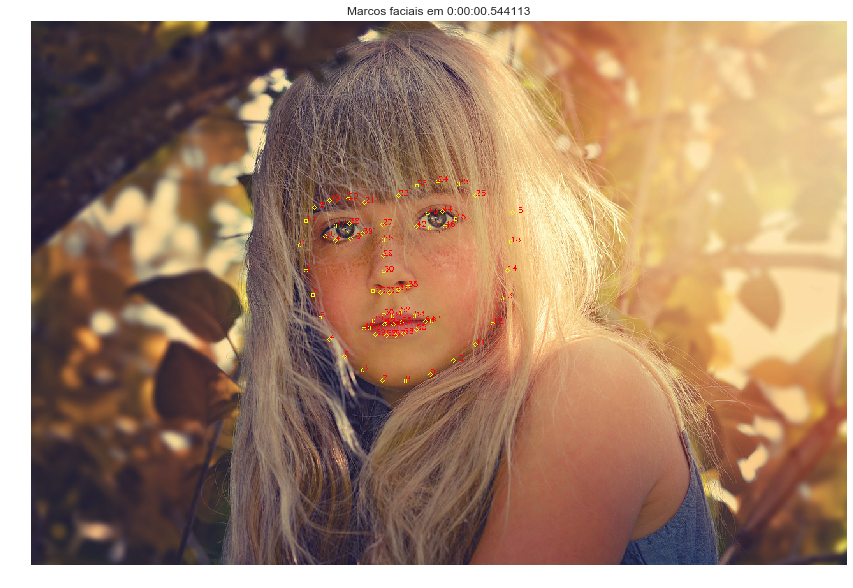

In [26]:
imagem = cv2.imread("imagens/girl.jpg")

inicio = datetime.datetime.now()
marcos = obter_marcos(imagem)
fim = datetime.datetime.now()

imagem_marcos = anotar_marcos(imagem, marcos)

imagem_marcos = cv2.cvtColor(imagem_marcos, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem_marcos)
plt.title("Marcos faciais em " + str(fim-inicio))

Aplicando a detecção e anotação utilizando uma câmera.

Text(0.5,1,'Marcos faciais')

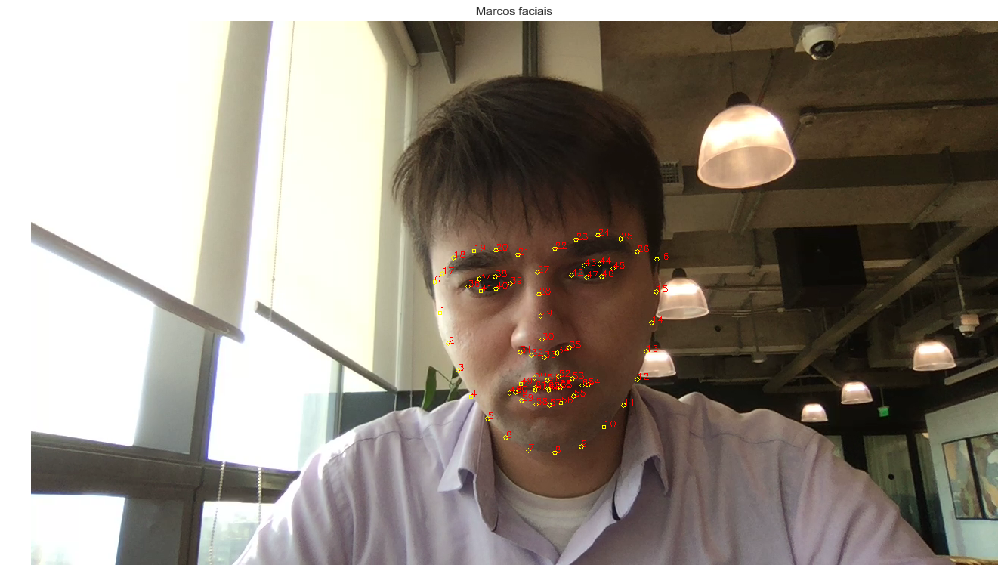

In [32]:
imagem = cv2.imread("imagens/camera_output_5.png")
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem)
plt.title("Marcos faciais")

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        marcos = obter_marcos(frame)
        frame_marcos = anotar_marcos(frame, marcos)
        frame = identificar_carros(frame)
        cv2.imshow("Marcos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

Lista de pontos de interesse da região da face, considerando detector de 68 pontos.

Função de anotação mais veloz, considerando o classificador de 5 pontos.

In [27]:
classificador_5_path = "modelos/shape_predictor_5_face_landmarks.dat"

classificador_simples = dlib.shape_predictor(classificador_5_path)
detector = dlib.get_frontal_face_detector()

def anotar_marcos_simples(im):
    im = im.copy()
    
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im
    
    for retangulo in retangulos:
        marcos = np.matrix([[p.x, p.y] for p in classificador_simples(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)
            
            for idx, ponto in enumerate(marcos):
                centro = (ponto[0, 0], ponto[0, 1])
                cv2.circle(im, centro, 5, color=(0, 255, 0))
        
    return im

Função de anotação de landmarks, retornará uma imagem com cada ponto centrado em um círculo.

Text(0.5,1,'Método simples')

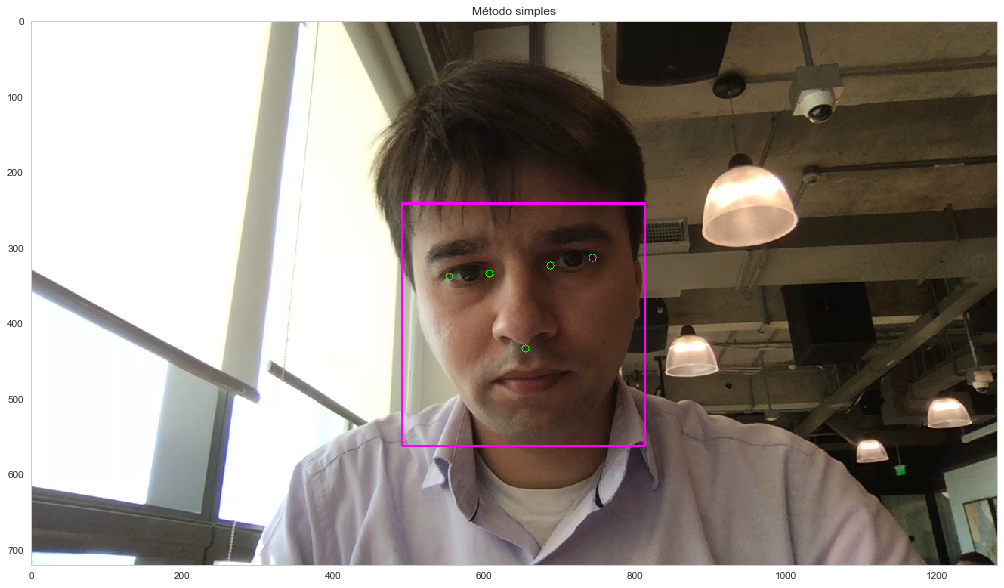

In [180]:
imagem = cv2.imread("imagens/camera_output_8.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Método simples")

Utilizando câmera identificação de pontos da face no método simples, que é o mais rápido.

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = anotar_marcos_simples(frame)
        cv2.imshow("Marcos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

In [34]:
FACE = list(range(17, 68))
FACE_COMPLETA = list(range(0, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIREITA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
MANDIBULA = list(range(0, 17))

Função para criar polígonos a partir dos pontos de identificação. Estes polígonos podem oferecer ferramentas como cálculo de área para identificação melhor das estruturas faciais, como piscadas, movimentação da boca, dentre outros.

In [28]:
def anotar_marcos_convex_hull(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im
    
    marcos = []
    
    for retangulo in retangulos:
        marcos = np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)

            pontos = cv2.convexHull(marcos[FACE_COMPLETA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)
            
            pontos = cv2.convexHull(marcos[NARIZ])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(marcos[LABIO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            area_boca = cv2.contourArea(pontos)   
            cv2.putText(im, "boca "+str(round(area_boca, 3)), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
            pontos = cv2.convexHull(marcos[SOMBRANCELHA_DIREITA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(marcos[SOMBRANCELHA_ESQUERDA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(marcos[OLHO_ESQUERDO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)
            
            pontos = cv2.convexHull(marcos[OLHO_DIREITO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            eye_aspect = eye_aspect_ratio(marcos[OLHO_DIREITO])
            cv2.putText(im, "olho direito "+str(round(eye_aspect, 3)), (d.left(),d.top()-35), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            eye_aspect = eye_aspect_ratio(marcos[OLHO_ESQUERDO])
            cv2.putText(im, "olho esquerdo "+str(round(eye_aspect, 3)), (d.left(),d.top()-55), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    return im

Função para cálculo do EAR, razão de aspecto dos olhos.

In [29]:
def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    a = dist.euclidean(eye[1], eye[5])
    b = dist.euclidean(eye[2], eye[4])
 
    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    c = dist.euclidean(eye[0], eye[3])
 
    # compute the eye aspect ratio
    ear = (a + b) / (2.0 * c)
 
    # return the eye aspect ratio
    return ear

Função para anotar os detalhes dos olhos com base na função de cálculo de aspecto de razão.

In [31]:
def anotar_olhos(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im
    
    marcos = []
    
    for retangulo in retangulos:
        marcos = np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)

            eye_aspect = eye_aspect_ratio(marcos[OLHO_DIREITO])
            cv2.putText(im, "olho direito "+str(round(eye_aspect,3)), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            eye_aspect = eye_aspect_ratio(marcos[OLHO_ESQUERDO])
            cv2.putText(im, "olho esquerdo "+str(round(eye_aspect,3)), (d.left(),d.top()-40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    return im

Testes com webcam para identificação de informações sobre os olhos.

Text(0.5,1,'Olhos')

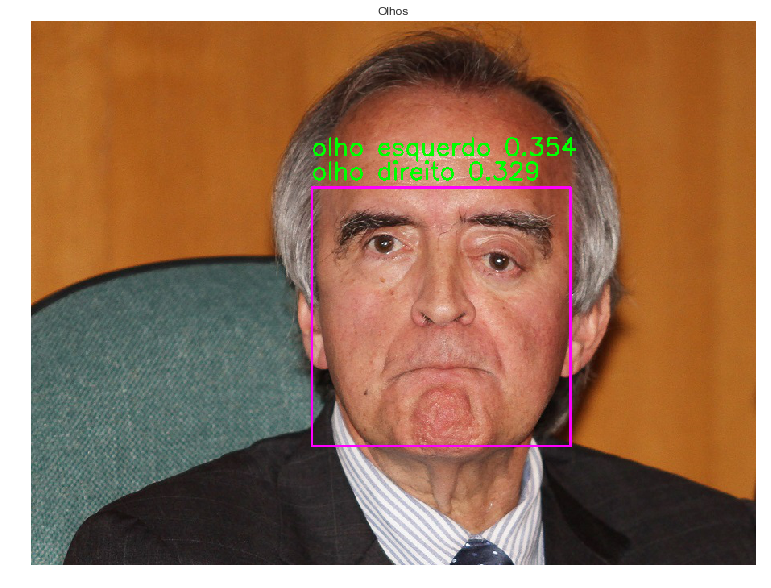

In [35]:
imagem = cv2.imread('imagens/cervero.jpeg')
imagem_anotada = anotar_olhos(imagem)

image_anotada = cv2.cvtColor(imagem_anotada, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(image_anotada)
plt.title("Olhos")

Extração de informações de outras regiões.

Text(0.5,1,'Anotação completa')

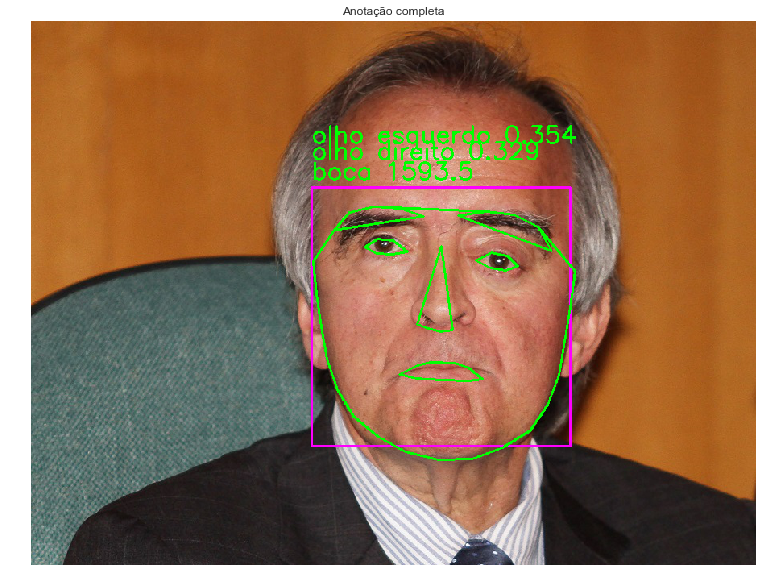

In [36]:
imagem = cv2.imread('imagens/cervero.jpeg')
imagem_anotada = anotar_marcos_convex_hull(imagem)

imagem_anotada = cv2.cvtColor(imagem_anotada, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem_anotada)
plt.title("Anotação completa")

Aplicando o uso dos marcos faciais em tempo real com câmera. Repare que diferentemente os classificadores em cascata, esse classificador que é baseado em SVM e HOG (por meio do Dlib) demora um pouco mais para processar.

Text(0.5,1,'Aspecto de olhos')

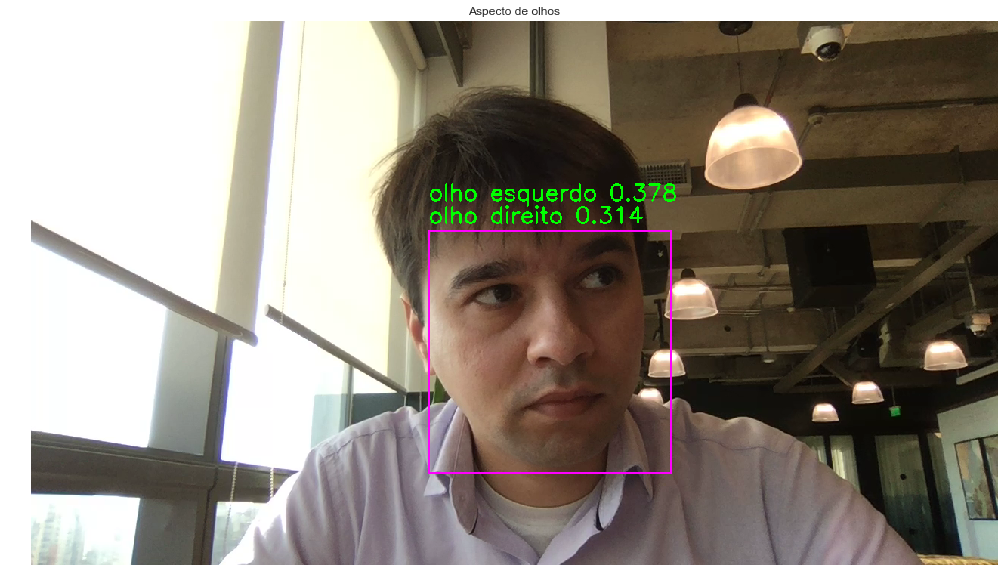

In [37]:
imagem = cv2.imread("imagens/camera_output_6.png")
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem)
plt.title("Aspecto de olhos")

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = anotar_olhos(frame)
        cv2.imshow("Marcos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

Utilizando câmera para identificaçao de informações da face utilizando polígonos.

In [171]:
def anotar_marcos_simples_unico(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) > 1:
        return im
    if len(retangulos) == 0:
        return im
    
    marcos = np.matrix([[p.x, p.y] for p in classificador_simples(im, retangulos[0]).parts()])
    
    for idx, ponto in enumerate(marcos):
        centro = (ponto[0, 0], ponto[0, 1])
        cv2.circle(im, centro, 1, color=(0, 255, 0))
        
    return im

Text(0.5,1,'Aspecto de olhos')

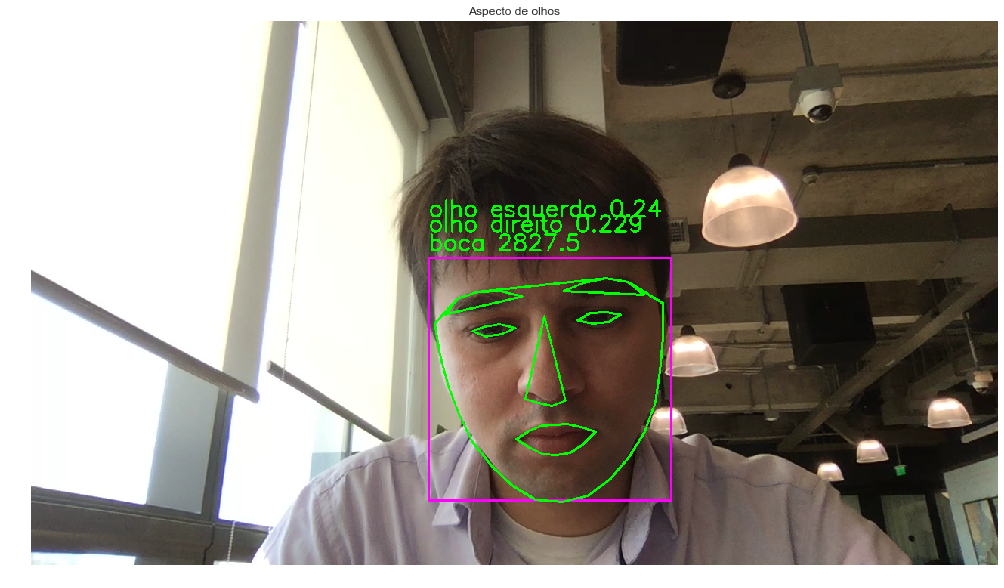

In [38]:
imagem = cv2.imread("imagens/camera_output_7.png")
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(imagem)
plt.title("Aspecto de olhos")

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = anotar_marcos_convex_hull(frame)
        cv2.imshow("Marcos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

## 7. Troca de rostos

Troca de rostos. Inicalmente utilizamos os marcadores da face para recortar adequadamente os rotos e posteriormente implantamos em outra imagem, aplicando suavizações em suas bordas.

_Retirado integralmente deste [curso do Rajeev Ratan](https://www.udemy.com/master-computer-vision-with-opencv-in-python)._

In [42]:
import cv2
import dlib
import numpy
from time import sleep
import sys

SCALE_FACTOR = 1 
FEATHER_AMOUNT = 11

FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))

# Points used to line up the images.
ALIGN_POINTS = (LEFT_BROW_POINTS + RIGHT_EYE_POINTS + LEFT_EYE_POINTS +
                               RIGHT_BROW_POINTS + NOSE_POINTS + MOUTH_POINTS)

# Points from the second image to overlay on the first. The convex hull of each
# element will be overlaid.
OVERLAY_POINTS = [
    LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
    NOSE_POINTS + MOUTH_POINTS,
]

# Amount of blur to use during colour correction, as a fraction of the
# pupillary distance.
COLOUR_CORRECT_BLUR_FRAC = 0.6

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(classificador_68_path)

def get_landmarks(im):
    # Returns facial landmarks as (x,y) coordinates
    rects = detector(im, 1)
    
    if len(rects) > 1:
        return im
    if len(rects) == 0:
        return im

    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])


def annotate_landmarks(im, landmarks):
    #Overlays the landmark points on the image itself
    
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(0, 255, 255))
    return im

def draw_convex_hull(im, points, color):
    points = cv2.convexHull(points)
    cv2.fillConvexPoly(im, points, color=color)

def get_face_mask(im, landmarks):
    im = numpy.zeros(im.shape[:2], dtype=numpy.float64)

    for group in OVERLAY_POINTS:
        draw_convex_hull(im,
                         landmarks[group],
                         color=1)

    im = numpy.array([im, im, im]).transpose((1, 2, 0))

    im = (cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (FEATHER_AMOUNT, FEATHER_AMOUNT), 0)

    return im
    
def transformation_from_points(points1, points2):
    """
    Return an affine transformation [s * R | T] such that:
        sum ||s*R*p1,i + T - p2,i||^2
    is minimized.
    """
    # Solve the procrustes problem by subtracting centroids, scaling by the
    # standard deviation, and then using the SVD to calculate the rotation. See
    # the following for more details:
    #   https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem

    points1 = points1.astype(numpy.float64)
    points2 = points2.astype(numpy.float64)

    c1 = numpy.mean(points1, axis=0)
    c2 = numpy.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = numpy.std(points1)
    s2 = numpy.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = numpy.linalg.svd(points1.T * points2)

    # The R we seek is in fact the transpose of the one given by U * Vt. This
    # is because the above formulation assumes the matrix goes on the right
    # (with row vectors) where as our solution requires the matrix to be on the
    # left (with column vectors).
    R = (U * Vt).T

    return numpy.vstack([numpy.hstack(((s2 / s1) * R,
                                       c2.T - (s2 / s1) * R * c1.T)),
                         numpy.matrix([0., 0., 1.])])

def read_im_and_landmarks(image):
    im = image
    im = cv2.resize(im,None,fx=1, fy=1, interpolation = cv2.INTER_LINEAR)
    im = cv2.resize(im, (im.shape[1] * SCALE_FACTOR,
                         im.shape[0] * SCALE_FACTOR))
    s = get_landmarks(im)

    return im, s

def warp_im(im, M, dshape):
    output_im = numpy.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)
    return output_im

def correct_colours(im1, im2, landmarks1):
    blur_amount = COLOUR_CORRECT_BLUR_FRAC * numpy.linalg.norm(
                              numpy.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              numpy.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    # Avoid divide-by-zero errors.
    im2_blur += (128 * (im2_blur <= 1.0)).astype(im2_blur.dtype)

    return (im2.astype(numpy.float64) * im1_blur.astype(numpy.float64) /
                                                im2_blur.astype(numpy.float64))

def swappy(image1, image2):
       
    im1, landmarks1 = read_im_and_landmarks(image1)
    im2, landmarks2 = read_im_and_landmarks(image2)

    M = transformation_from_points(landmarks1[ALIGN_POINTS],
                                   landmarks2[ALIGN_POINTS])
    
    mask = get_face_mask(im2, landmarks2)
    warped_mask = warp_im(mask, M, im1.shape)
    combined_mask = numpy.max([get_face_mask(im1, landmarks1), warped_mask],
                              axis=0)

    warped_im2 = warp_im(im2, M, im1.shape)
    warped_corrected_im2 = correct_colours(im1, warped_im2, landmarks1)

    output_im = im1 * (1.0 - combined_mask) + warped_corrected_im2 * combined_mask
    cv2.imwrite('output.jpg', output_im)
    image = cv2.imread('output.jpg')
    return image
   

## Enter the paths to your input images here    
image1 = cv2.imread('imagens/fausto.png')
image2 = cv2.imread('imagens/silvio.jpg')

swapped_1 = swappy(image1, image2)
swapped_2 = swappy(image2, image1)

(-0.5, 824.5, 508.5, -0.5)

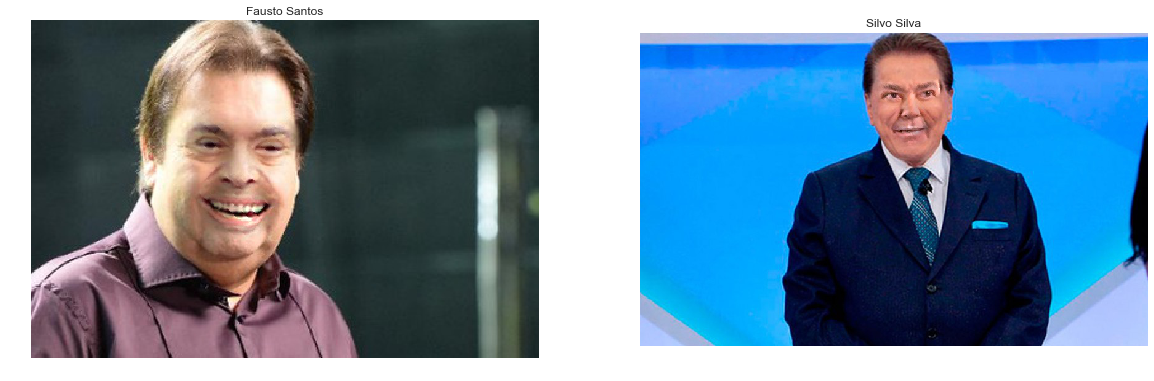

In [43]:
plt.figure(figsize=(20,20))

swapped_1 = cv2.cvtColor(swapped_1, cv2.COLOR_BGR2RGB)
swapped_2 = cv2.cvtColor(swapped_2, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(swapped_1)
plt.title("Fausto Santos")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(swapped_2)
plt.title("Silvo Silva")
plt.axis('off')

(-0.5, 1279.5, 719.5, -0.5)

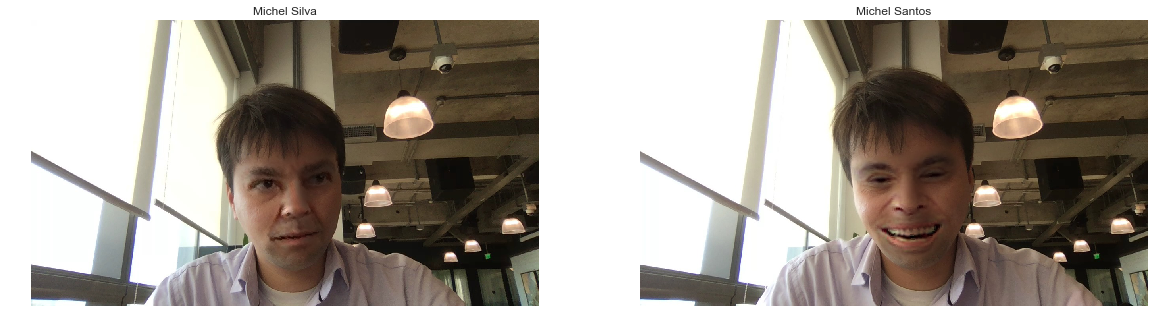

In [40]:
plt.figure(figsize=(20,20))

imagem1 = cv2.imread("imagens/camera_output_9.png")
imagem2 = cv2.imread("imagens/camera_output_10.png")

plt.subplot(1,2,1)
plt.imshow(imagem1)
plt.title("Michel Silva")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imagem2)
plt.title("Michel Santos")
plt.axis('off')

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame = swappy(frame, image1)
        cv2.imshow("Marcos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()